In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_colwidth', 50)
pd.options.display.float_format = '{:.3f}'.format

%matplotlib inline

In [2]:
crime_raw = pd.read_excel('ny_offenses_2013.xls', delimiter= '\t', header=0)
crime_raw.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861.000,0.000,0.000,nan,0.000,0.000,0.000,12.000,2.000,10.000,0.000,0.000
1,Addison Town and Village,2577.000,3.000,0.000,nan,0.000,0.000,3.000,24.000,3.000,20.000,1.000,0.000
2,Akron Village,2846.000,3.000,0.000,nan,0.000,0.000,3.000,16.000,1.000,15.000,0.000,0.000
3,Albany,97956.000,791.000,8.000,nan,30.000,227.000,526.000,4090.000,705.000,3243.000,142.000,nan
4,Albion Village,6388.000,23.000,0.000,nan,3.000,4.000,16.000,223.000,53.000,165.000,5.000,nan


In [3]:
# Drop this column as it's completely empty -- I verified this on the source site
crime_raw.drop(columns="Rape\n(revised\ndefinition)1", inplace=True)

In [4]:
crime_raw.columns

Index(['City', 'Population', 'Violent\ncrime',
       'Murder and\nnonnegligent\nmanslaughter', 'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault', 'Property\ncrime', 'Burglary',
       'Larceny-\ntheft', 'Motor\nvehicle\ntheft', 'Arson3'],
      dtype='object')

In [5]:
cols = ['City', 'Population', 'Violent Crime', 'Murder NNMS', 'Rape', 'Robbery', 'Aggr Assault',
        'Property Crime', 'Burglary', 'Larceny-Theft', 'Motor Vehicle Theft', 'Arson']
crime_raw.columns = cols
crime_raw.fillna(0, inplace=True)
crime_raw.head()

,City,Population,Violent Crime,Murder NNMS,Rape,Robbery,Aggr Assault,Property Crime,Burglary,Larceny-Theft,Motor Vehicle Theft,Arson
0,Adams Village,1861.000,0.000,0.000,0.000,0.000,0.000,12.000,2.000,10.000,0.000,0.000
1,Addison Town and Village,2577.000,3.000,0.000,0.000,0.000,3.000,24.000,3.000,20.000,1.000,0.000
2,Akron Village,2846.000,3.000,0.000,0.000,0.000,3.000,16.000,1.000,15.000,0.000,0.000
3,Albany,97956.000,791.000,8.000,30.000,227.000,526.000,4090.000,705.000,3243.000,142.000,0.000
4,Albion Village,6388.000,23.000,0.000,3.000,4.000,16.000,223.000,53.000,165.000,5.000,0.000


In [6]:
crime_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 12 columns):
City                   351 non-null object
Population             351 non-null float64
Violent Crime          351 non-null float64
Murder NNMS            351 non-null float64
Rape                   351 non-null float64
Robbery                351 non-null float64
Aggr Assault           351 non-null float64
Property Crime         351 non-null float64
Burglary               351 non-null float64
Larceny-Theft          351 non-null float64
Motor Vehicle Theft    351 non-null float64
Arson                  351 non-null float64
dtypes: float64(11), object(1)
memory usage: 33.0+ KB


In [7]:
# Getting rid of bottom rows that aren't actually part of the data
crime_raw = crime_raw[crime_raw["Population"] > 0]
crime_raw.loc[:, "Population":].describe(include='all')

,Population,Violent Crime,Murder NNMS,Rape,Robbery,Aggr Assault,Property Crime,Burglary,Larceny-Theft,Motor Vehicle Theft,Arson
count,348.000,348.000,348.000,348.000,348.000,348.000,348.000,348.000,348.000,348.000,348.000
mean,40037.632,201.595,1.566,5.865,72.902,121.261,792.606,119.684,637.017,35.905,1.006
std,450037.368,2815.269,18.304,60.425,1031.033,1706.132,7659.725,924.949,6346.054,403.424,7.885
min,526.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,3003.000,2.000,0.000,0.000,0.000,1.000,40.500,6.000,31.000,0.000,0.000
50%,7233.500,6.000,0.000,0.000,1.000,4.000,112.500,17.500,94.000,2.000,0.000
75%,18427.500,22.000,0.000,2.000,5.000,14.000,341.000,51.250,287.250,7.000,0.000
max,8396126.000,52384.000,335.000,1112.000,19170.000,31767.000,141971.000,16606.000,117931.000,7434.000,132.000


### NYC completely skews everything, so I'm breaking it out by itself; now I can get more reasonable plots and stats.  The NYC info can be accessed directly as 'NYC' now as its own dataframe.

In [8]:
NYC = pd.DataFrame(crime_raw[crime_raw["City"] == "New York"])
crime_raw.drop(index=216, inplace=True)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


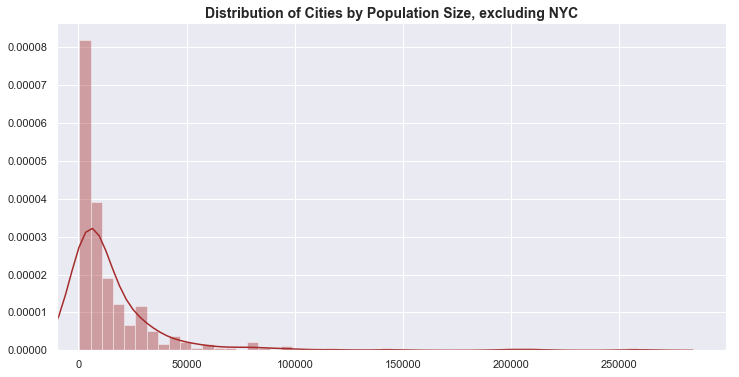

In [9]:
sns.set()
fig, ax = plt.subplots(figsize=(12,6))
sns.distplot(crime_raw["Population"], color="brown")
ax.set_xlim(left=-10000)
ax.set_title("Distribution of Cities by Population Size, excluding NYC", fontsize=14, fontweight='bold')
ax.set_xlabel("")
sns.despine()
plt.show()

In [10]:
def two_boxen(colors, columns, df):
    """
    Rather than repeat code, I made this into a function.
    IN: A list of 2 colors, a list of 2 columns, and a dataframe
    OUT: Displays the boxenplots based on parameters
    
    EX: two_boxen(["royalblue", "olivedrab"], ["Robbery", "Murder NNMS"], crime_raw)
    """
    first_col = df[columns[0]]
    sec_col = df[columns[1]]

    fig, axes = plt.subplots(2, 1, sharex=False, figsize=(14,4))
    
    # Setting a title and empty xlabel, because I want the 2 labels separated and not interfering
    sns.boxenplot(first_col, ax=axes[0], color=colors[0]).set_title(columns[0], fontsize=14, fontweight='bold')
    axes[0].set_xlabel("")
    
    # No title, but x_label, see comment above
    sns.boxenplot(sec_col, ax=axes[1], color=colors[1]).set_xlabel(columns[1], fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()

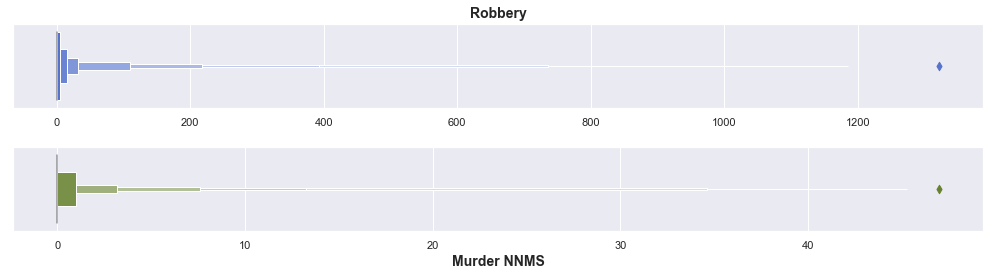

In [11]:
# I was doing this several times, decided to make a function
two_boxen(["royalblue", "olivedrab"], ["Robbery", "Murder NNMS"], crime_raw)

In [12]:
# looking at the outlier shown above
crime_raw[crime_raw["Robbery"] > 1200]

,City,Population,Violent Crime,Murder NNMS,Rape,Robbery,Aggr Assault,Property Crime,Burglary,Larceny-Theft,Motor Vehicle Theft,Arson
35,Buffalo,258789.000,3249.000,47.000,145.000,1322.000,1735.000,12491.000,3458.000,8076.000,957.000,0.000


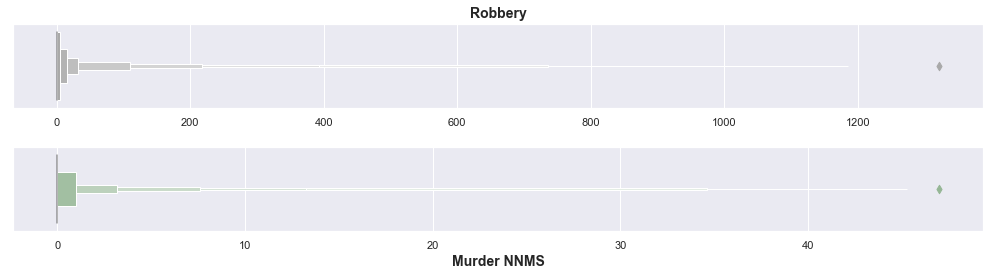

In [13]:
# Again just my little boxenplot function to look at these columns
two_boxen(["darkgrey", "darkseagreen"], ["Robbery", "Murder NNMS"], crime_raw)

### I'm being silly by looking for outliers like this.... Time to be smarter

In [14]:
print(crime_raw["Robbery"].nlargest(5))
print(crime_raw["Murder NNMS"].nlargest(5))
crime_raw[(crime_raw["Robbery"] > 390) & (crime_raw["Murder NNMS"] > 20)][["City", "Population", "Murder NNMS", "Robbery"]]

35    1322.000
272    918.000
310    400.000
346    390.000
206    228.000
Name: Robbery, dtype: float64
35    47.000
272   42.000
310   21.000
140   10.000
3      8.000
Name: Murder NNMS, dtype: float64


,City,Population,Murder NNMS,Robbery
35,Buffalo,258789.000,47.000,1322.000
272,Rochester,210562.000,42.000,918.000
310,Syracuse,143834.000,21.000,400.000


### Removing these should clean things up nicely, still nearly 350 data points in the set

In [15]:
crime_raw.drop(index=35, inplace=True)
crime_raw.drop(index=272, inplace=True)
crime_raw.drop(index=310, inplace=True)

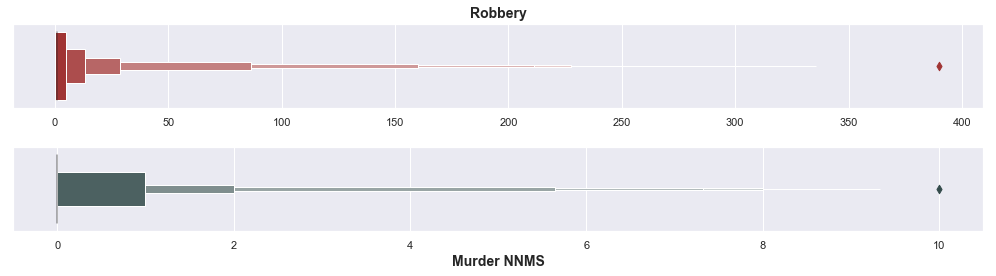

In [16]:
two_boxen(["firebrick", "darkslategrey"], ["Robbery", "Murder NNMS"], crime_raw)

### Now look, the top spot in each category is actually different, whereas the 3 (if you include NYC, 4) I dropped otherwise occupied the same location in each category.

In [17]:
print(crime_raw["Robbery"].nlargest(5))
print(crime_raw["Murder NNMS"].nlargest(5))

346   390.000
206   228.000
3     227.000
140   204.000
285   203.000
Name: Robbery, dtype: float64
140   10.000
3      8.000
285    8.000
262    7.000
321    7.000
Name: Murder NNMS, dtype: float64


### I'm feeling a LOT more comfortable with Seaborn and Matplotlib, thankfully.  Anyway, these plots aren't particularly informative, but here they are -- I'm just having a look at the other variables that we're NOT making into features (yet).

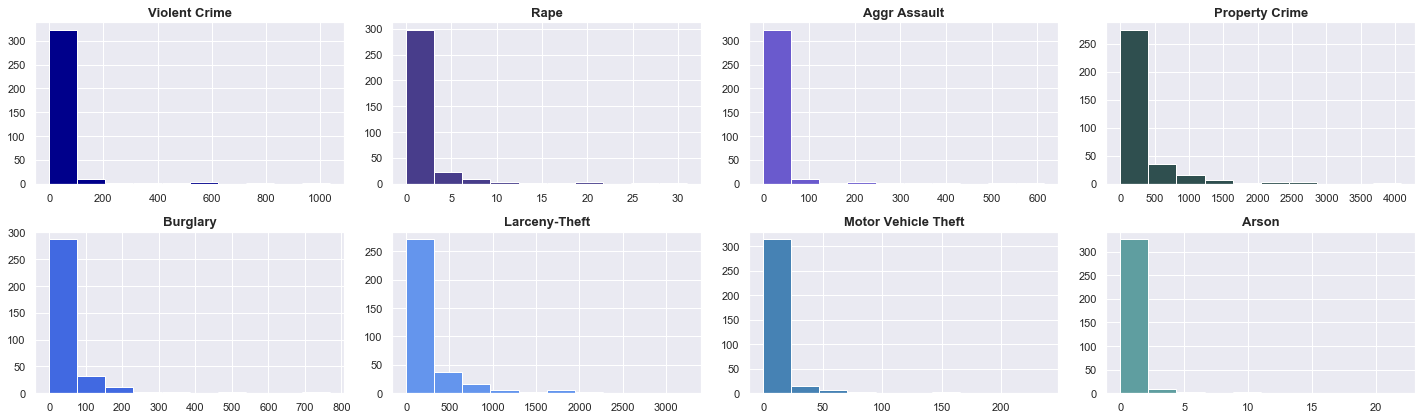

In [18]:
# Two lists for use below, decided to have a little color fun
crimes = list(crime_raw.columns.drop(["City", "Population", "Murder NNMS", "Robbery"]))
plot_colors = ["darkblue", "darkslateblue", "slateblue", "darkslategrey",
               "royalblue", "cornflowerblue", "steelblue", "cadetblue"]

fig = plt.figure(figsize=(20,6))

# This range is used because the subplot() call wants a specific 3-digit number, which is Row,
# Col, and Num (which overal subplot number); It's easy enough to then subtract and get proper
# indexing (start at 0) for my colors and columns.
for num in range(241, 249):
    col = num - 241
    fig.add_subplot(num)
    plt.hist(crime_raw[crimes[col]].dropna(), color=plot_colors[col])
    plt.title(crimes[col], fontsize=13, fontweight='bold')
    
plt.tight_layout()
plt.show()

### Create the requested features, do a bit of One Hot encoding

In [19]:
features = pd.DataFrame(crime_raw["Population"])
features["Pop Squared"] = crime_raw["Population"] ** 2
features["Robbery"] = np.where((crime_raw["Robbery"] > 0), 1, 0)
features["Murder"] = np.where((crime_raw["Murder NNMS"] > 0), 1, 0)

In [20]:
features.head()

,Population,Pop Squared,Robbery,Murder
0,1861.000,3463321.000,0,0
1,2577.000,6640929.000,0,0
2,2846.000,8099716.000,0,0
3,97956.000,9595377936.000,1,1
4,6388.000,40806544.000,1,0
